In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from catboost import Pool
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import ValidationCurve
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import resreg
import time

In [6]:
data1 = pd.read_csv('./exchange_ratePrice10000000Lot1000000Sqft10000_ptta.csv')
data1 = data1[data1['houseprice'] >= 200000][data1['houseprice']<=3000000]
data1 = data1[data1['lot'] < 100000]
data1 = data1.drop(columns = ['_25k', '25k_60k','60k_150k', '150k_',
                              'male', 'female', 'sexRatio',
                              'White', 'African', 'Asian', 
                              'Hawaiian', 'Indian', 'Others',
                              'WhiteRatio','MaleMedianAge',
                              'FemaleMedianAge'])
X = data1.iloc[:,:-1].values
y= data1.iloc[:,-1].values
startTime = time.time()
X2 = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X2, y,
                     test_size=0.20)
trainedcat = CatBoostRegressor(
                                iterations=950,
                                learning_rate=0.12,
                                max_depth=8,
                                verbose=100,
                                l2_leaf_reg=1,
                                border_count = 256
)
trainedcat.fit(X_train,y_train,plot=True) # cat_features
y_train_pred = trainedcat.predict(X_train)
y_test_pred = trainedcat.predict(X_test)
print(time.time()-startTime)
print('測試正確率: %.3f' % trainedcat.score(X_test, y_test))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Boolean Series key will be reindexed to match DataFrame index.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 421466.3452660	total: 120ms	remaining: 1m 54s
100:	learn: 137339.9597118	total: 1.13s	remaining: 9.49s
200:	learn: 124713.9097813	total: 2.1s	remaining: 7.84s
300:	learn: 115971.3152985	total: 3.05s	remaining: 6.57s
400:	learn: 108902.9952422	total: 4.02s	remaining: 5.5s
500:	learn: 103498.7980367	total: 4.98s	remaining: 4.46s
600:	learn: 98617.5966535	total: 5.93s	remaining: 3.44s
700:	learn: 94483.7145091	total: 6.87s	remaining: 2.44s
800:	learn: 91004.5074826	total: 7.83s	remaining: 1.46s
900:	learn: 87614.3586393	total: 8.92s	remaining: 485ms
949:	learn: 85967.3990264	total: 9.53s	remaining: 0us
12.3689284324646
測試正確率: 0.901
MSE train: 7390393695.370, test: 20872305090.853
R^2 train: 0.966, test: 0.901


In [7]:
cols2=[] # 繪圖用欄位名稱
for i in data1.columns:
    cols2.append(i)
cols2.pop()

'houseprice'

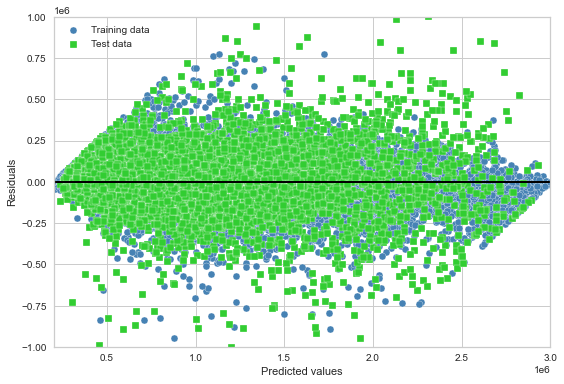

In [8]:
# 第二種殘插圖看喜歡哪個
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=20000000, color='black', lw=2)
plt.xlim([200000, 3000000])
plt.ylim([-1000000,1000000])
plt.tight_layout()

# plt.savefig('demo6_1.png', dpi=300)
plt.show()

Text(0.5, 1.0, 'RF features importance:')

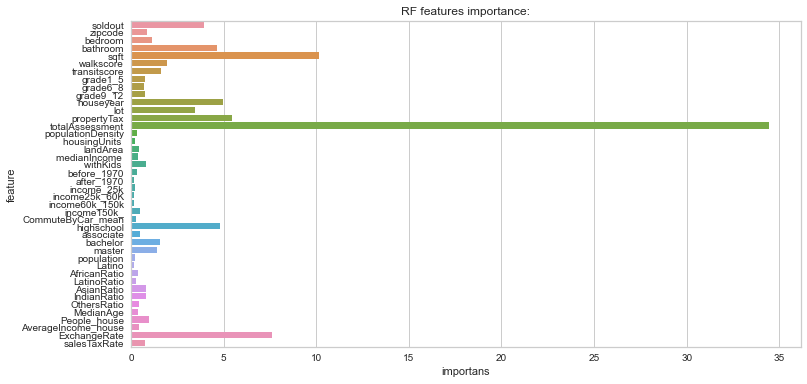

In [9]:
# 重要特徵長條圖
importances = []
for i in trainedcat.feature_importances_:
    importances.append(i)

feature_dict = {"feature": cols2,"importans":importances}
feature_importance_df =pd.DataFrame(feature_dict)
plt.figure(figsize=(12, 6))
sns.barplot(x="importans", y="feature", data=feature_importance_df)
plt.title('RF features importance:')

<AxesSubplot:>

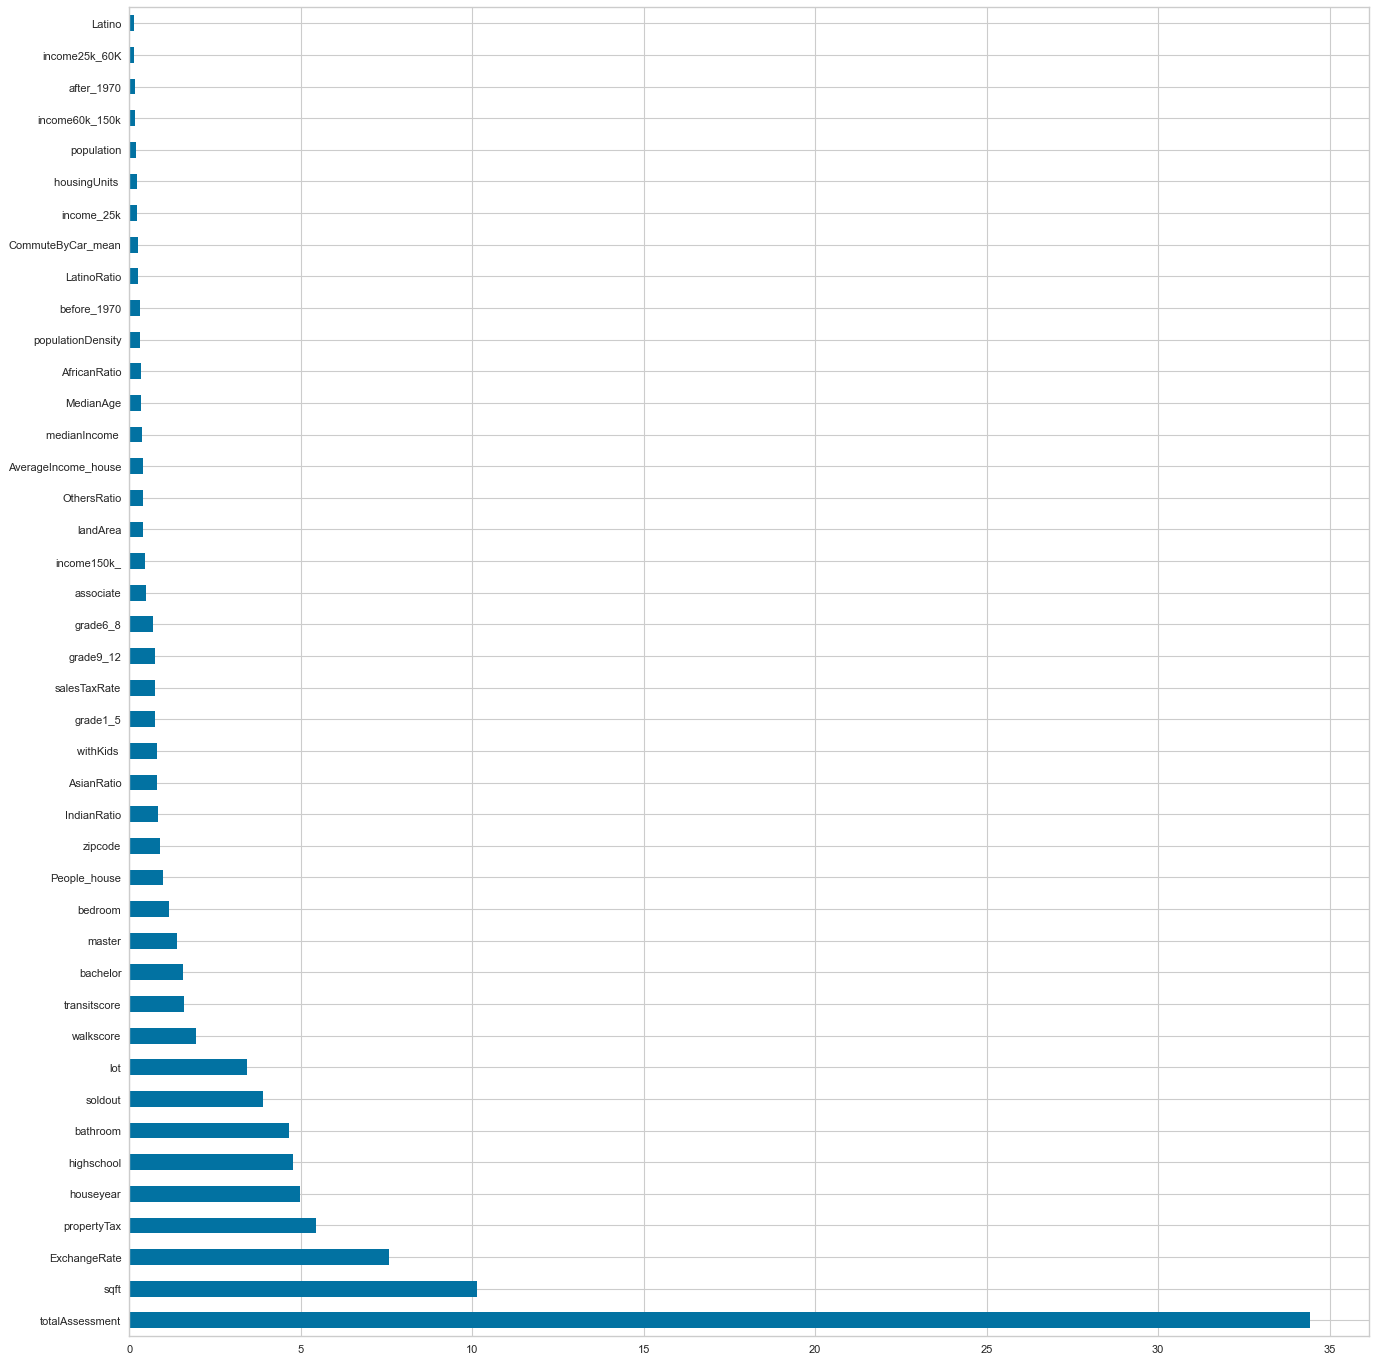

In [10]:
# 兩種圖看喜歡哪一個
plt.figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedcat.feature_importances_, index= cols2)
feat_importances.nlargest(56).plot(kind='barh')

In [19]:
# grid_search_cv
data1 = pd.read_csv('./exchange_ratePrice10000000Lot1000000Sqft10000_ptta.csv')
data1 = data1[data1['houseprice'] >= 200000][data1['houseprice']<=3000000]
data1 = data1[data1['lot'] < 100000]
data1 = data1.drop(columns = ['_25k', '25k_60k','60k_150k', '150k_',
                              'male', 'female', 'sexRatio',
                              'White', 'African', 'Asian', 'Hawaiian', 'Indian', 'Others',
                              'WhiteRatio','MaleMedianAge',
                              'FemaleMedianAge'])
data1['zipcode'] = data1['zipcode'].astype(str)
data1['zipcode'] = data1['zipcode'].astype('category')
X = data1.iloc[:,:-1].values
y= data1.iloc[:,-1].values
X2 = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X2, y,
                     test_size=0.20)

trainedcat = CatBoostRegressor(
                                iterations=950,
                                learning_rate=0.12,
                                max_depth=8,
                                verbose=100,
                                l2_leaf_reg=1,
                                border_count = 256
)
cv_params = {'l2_leaf_reg':[0.8,0.9,1,1.1,1.2]}
xgb_cv = GridSearchCV(trainedcat,param_grid=cv_params, scoring='r2', cv=3, verbose=2, n_jobs=-1)
xgb_cv.fit(X_train,y_train,verbose=100)
# randomized_search_result = trainedcat.grid_search(cv_params,
#                                                    X=X_train,
#                                                    y=y_train,
#                                                    cv = 3,
#                                                    plot=True)
y_train_pred = xgb_cv.predict(X_train)
y_test_pred = xgb_cv.predict(X_test)
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print(xgb_cv.best_score_)
print(xgb_cv.best_params_)

print("Best score: %0.3f" % xgb_cv.best_score_) # 模型最佳績效
print("Best parameters set:") # 窮舉後的最佳參數
best_parameters = xgb_cv.best_estimator_.get_params()
for param_name in sorted(cv_params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Boolean Series key will be reindexed to match DataFrame index.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


0:	learn: 419115.4859188	total: 13.3ms	remaining: 12.6s
100:	learn: 138089.5622430	total: 1.23s	remaining: 10.3s
200:	learn: 125114.8964584	total: 2.42s	remaining: 9.02s
300:	learn: 116481.2334264	total: 3.58s	remaining: 7.71s
400:	learn: 109527.4179461	total: 4.82s	remaining: 6.6s
500:	learn: 103964.9119433	total: 5.94s	remaining: 5.32s
600:	learn: 99569.2955856	total: 7.09s	remaining: 4.12s
700:	learn: 95379.3060874	total: 8.21s	remaining: 2.92s
800:	learn: 91528.3550481	total: 9.32s	remaining: 1.73s
900:	learn: 88168.5398022	total: 10.4s	remaining: 567ms
949:	learn: 86564.8744410	total: 11s	remaining: 0us
R^2 train: 0.965, test: 0.904
0.8994147207958113
{'l2_leaf_reg': 1.2}
Best score: 0.899
Best parameters set:
	l2_leaf_reg: 1.2


In [20]:
cv = pd.DataFrame(xgb_cv.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l2_leaf_reg,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,65.532779,0.627028,0.519943,0.059408,0.8,{'l2_leaf_reg': 0.8},0.892722,0.902415,0.901154,0.898764,0.004303,5
1,65.881514,0.954240,0.519943,0.078006,0.9,{'l2_leaf_reg': 0.9},0.892457,0.902582,0.903011,0.899350,0.004877,3
2,66.642479,0.329470,0.466088,0.045210,1,{'l2_leaf_reg': 1},0.892786,0.902346,0.903075,0.899402,0.004688,2
3,64.882519,1.041088,0.524930,0.067742,1.1,{'l2_leaf_reg': 1.1},0.892705,0.902306,0.902710,0.899240,0.004624,4
4,20.848589,0.375648,0.306845,0.009080,1.2,{'l2_leaf_reg': 1.2},0.893650,0.902496,0.902097,0.899415,0.004079,1


In [21]:
# kfold
data1 = pd.read_csv('./exchange_ratePrice10000000Lot1000000Sqft10000_ptta.csv')
data1 = data1[data1['houseprice'] >= 200000][data1['houseprice']<=3000000]
data1 = data1[data1['lot'] < 100000]
data1 = data1.drop(columns = ['_25k', '25k_60k','60k_150k', '150k_',
                              'male', 'female', 'sexRatio',
                              'White', 'African', 'Asian', 
                              'Hawaiian', 'Indian', 'Others',
                              'WhiteRatio','MaleMedianAge',
                              'FemaleMedianAge'])
data1['zipcode'] = data1['zipcode'].astype(str)
data1['zipcode'] = data1['zipcode'].astype('category')
X = data1.iloc[:,:-1].values
y= data1.iloc[:,-1].values
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                     test_size=0.20)
trainedcat = CatBoostRegressor(
                                iterations=950,
                                learning_rate=0.12,
                                max_depth=8,
                                verbose=100,
                                l2_leaf_reg=1,
                                border_count = 256
)
pipe_lr = make_pipeline(StandardScaler(),
                        trainedcat)
kfold = StratifiedKFold(n_splits=6).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Acc: %.3f' % (k+1,score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Boolean Series key will be reindexed to match DataFrame index.
The least populated class in y has only 1 members, which is less than n_splits=6.


0:	learn: 418633.1319238	total: 11.7ms	remaining: 11.1s
100:	learn: 136908.3423205	total: 901ms	remaining: 7.57s
200:	learn: 122555.0449706	total: 1.9s	remaining: 7.08s
300:	learn: 113417.3937070	total: 2.92s	remaining: 6.29s
400:	learn: 105937.4342932	total: 3.93s	remaining: 5.38s
500:	learn: 100259.8554554	total: 4.94s	remaining: 4.43s
600:	learn: 95109.1170908	total: 5.98s	remaining: 3.47s
700:	learn: 90815.7653332	total: 7s	remaining: 2.49s
800:	learn: 86897.2712138	total: 8.03s	remaining: 1.49s
900:	learn: 83273.8426932	total: 9.06s	remaining: 493ms
949:	learn: 81769.9514845	total: 9.58s	remaining: 0us
Fold:  1, Acc: 0.903
0:	learn: 419846.3092358	total: 12.3ms	remaining: 11.7s
100:	learn: 137421.1491999	total: 993ms	remaining: 8.35s
200:	learn: 123162.5006374	total: 2s	remaining: 7.46s
300:	learn: 113592.4665354	total: 3.02s	remaining: 6.52s
400:	learn: 106150.5238721	total: 4.06s	remaining: 5.55s
500:	learn: 100340.3698002	total: 5.1s	remaining: 4.57s
600:	learn: 95444.9419273	t